## Introduction
Junyi Academy Foundation, a non-profit organization based in Taiwan that aims to provide all children equitable quality education by technology, is eager to support our learning community during this pandemic. They released a dataset consisting of over 16 million exercise attempt logs on our platform from more than 72,000 students over the course of a year (from 2018/08 to 2019/07). I used their dataset to predict the level a student will acheive in each online course exercise using a Random Forest Model.This could empower the research of creating a better and personalized learning experience for students, and further encourage broader participation for contributing to the future of online learning from interdisciplinary experts.


https://www.kaggle.com/junyiacademy/learning-activity-public-dataset-by-junyi-academy

APA Style citation of the dataset:
    
    P. J. Chen, M. E. Hsieh, T. Y. Tsai. Junyi Online Learning Dataset: A large-scale public online learning activity dataset from elementary to senior high school students., 2020. Available from https://www.kaggle.com/junyiacademy/learning-activity-public-dataset-by-junyi-academy".

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

** some of the data exploration visuals code was sourced from  >>> https://www.kaggle.com/kerneler/starter-junyi-academy-online-learning-7c74893b-e

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 3 csv files in the current version of the dataset:


In [57]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/Info_UserData.csv
/kaggle/input/Log_Problem.csv
/kaggle/input/Info_Content.csv


The next hidden code cells define functions for plotting data.

In [58]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [59]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [60]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/Info_Content.csv

In [61]:
nRowsRead = 30000 # specify 'None' if want to read whole file
# Info_Content.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_content = pd.read_csv('/kaggle/input/Info_Content.csv', delimiter=',', nrows = nRowsRead)
df_content.dataframeName = 'Info_Content.csv'
nRow, nCol = df_content.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1330 rows and 10 columns


Let's take a quick look at what the data looks like:

In [62]:
df_content.head()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


Distribution graphs (histogram/bar graph) of sampled columns:

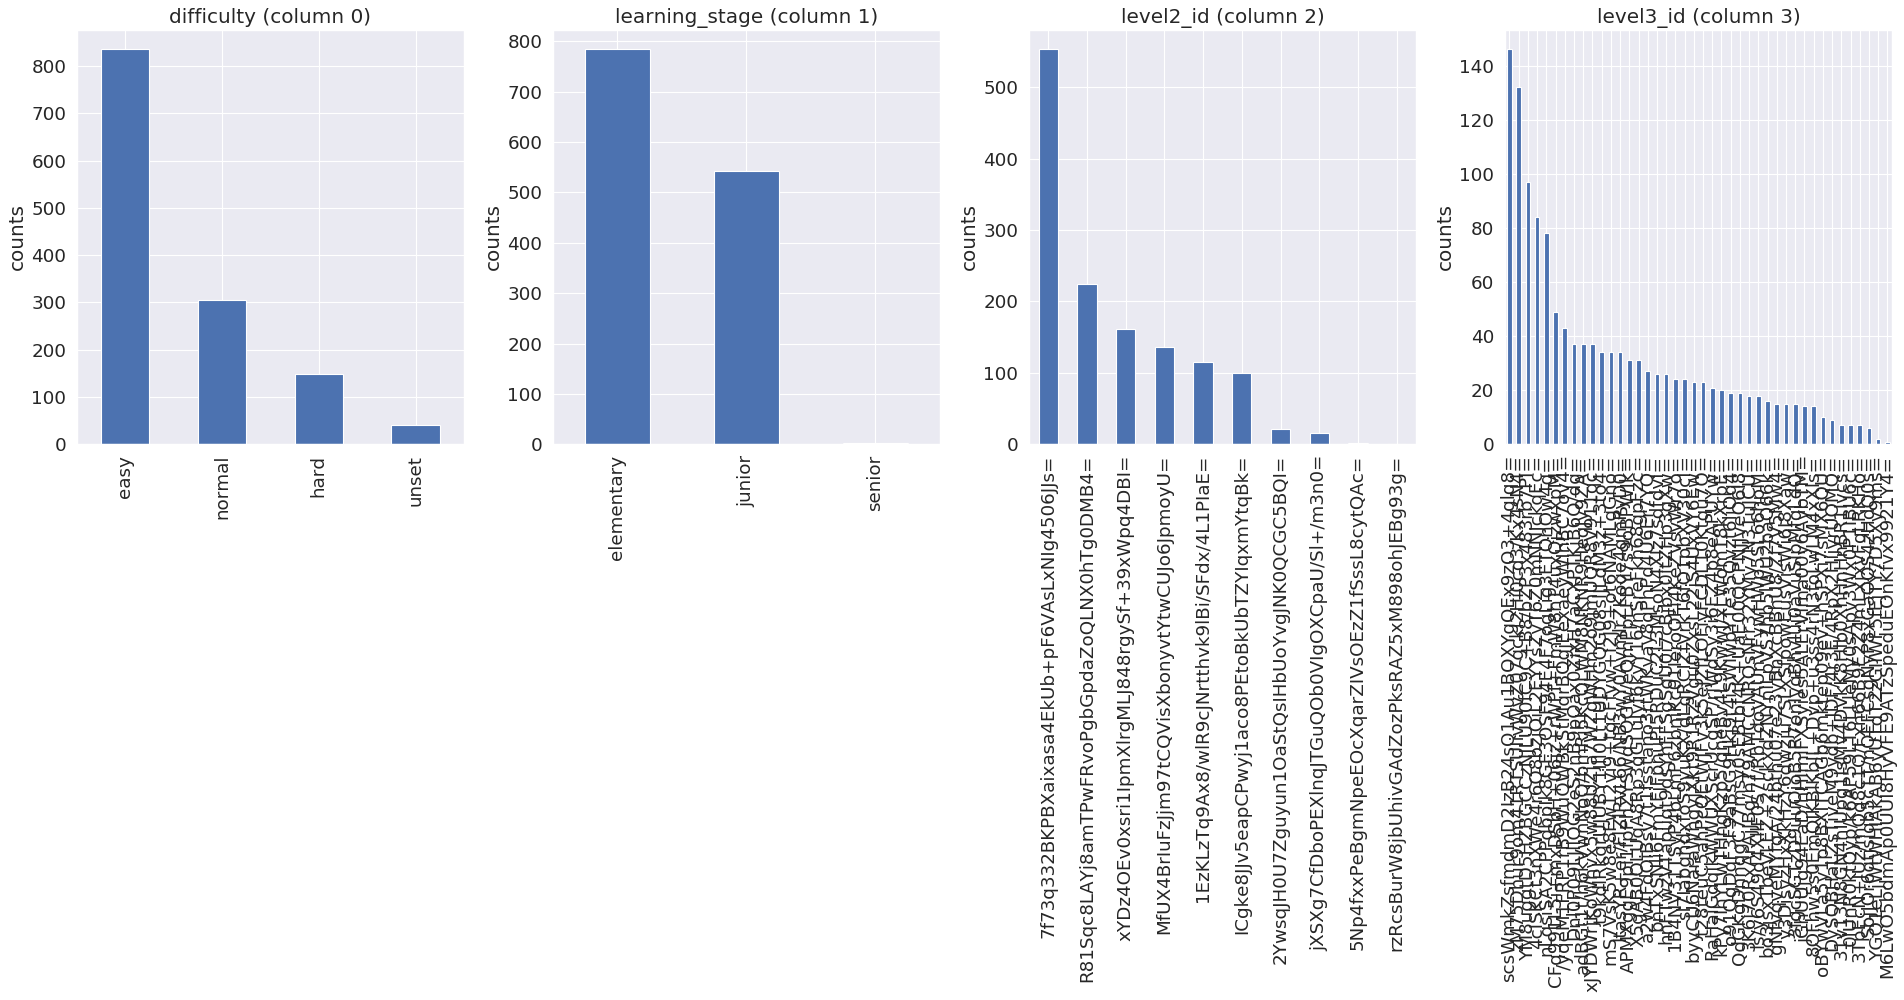

In [63]:
plotPerColumnDistribution(df_content, 10, 5)

### Let's check 2nd file: /kaggle/input/Info_UserData.csv

In [64]:

# Info_UserData.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_userdata = pd.read_csv('/kaggle/input/Info_UserData.csv', delimiter=',', nrows = nRowsRead)
df_userdata.dataframeName = 'Info_UserData.csv'
nRow, nCol = df_userdata.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 12 columns


Let's take a quick look at what the data looks like:

In [65]:
df_userdata.head(5)

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


Distribution graphs (histogram/bar graph) of sampled columns:

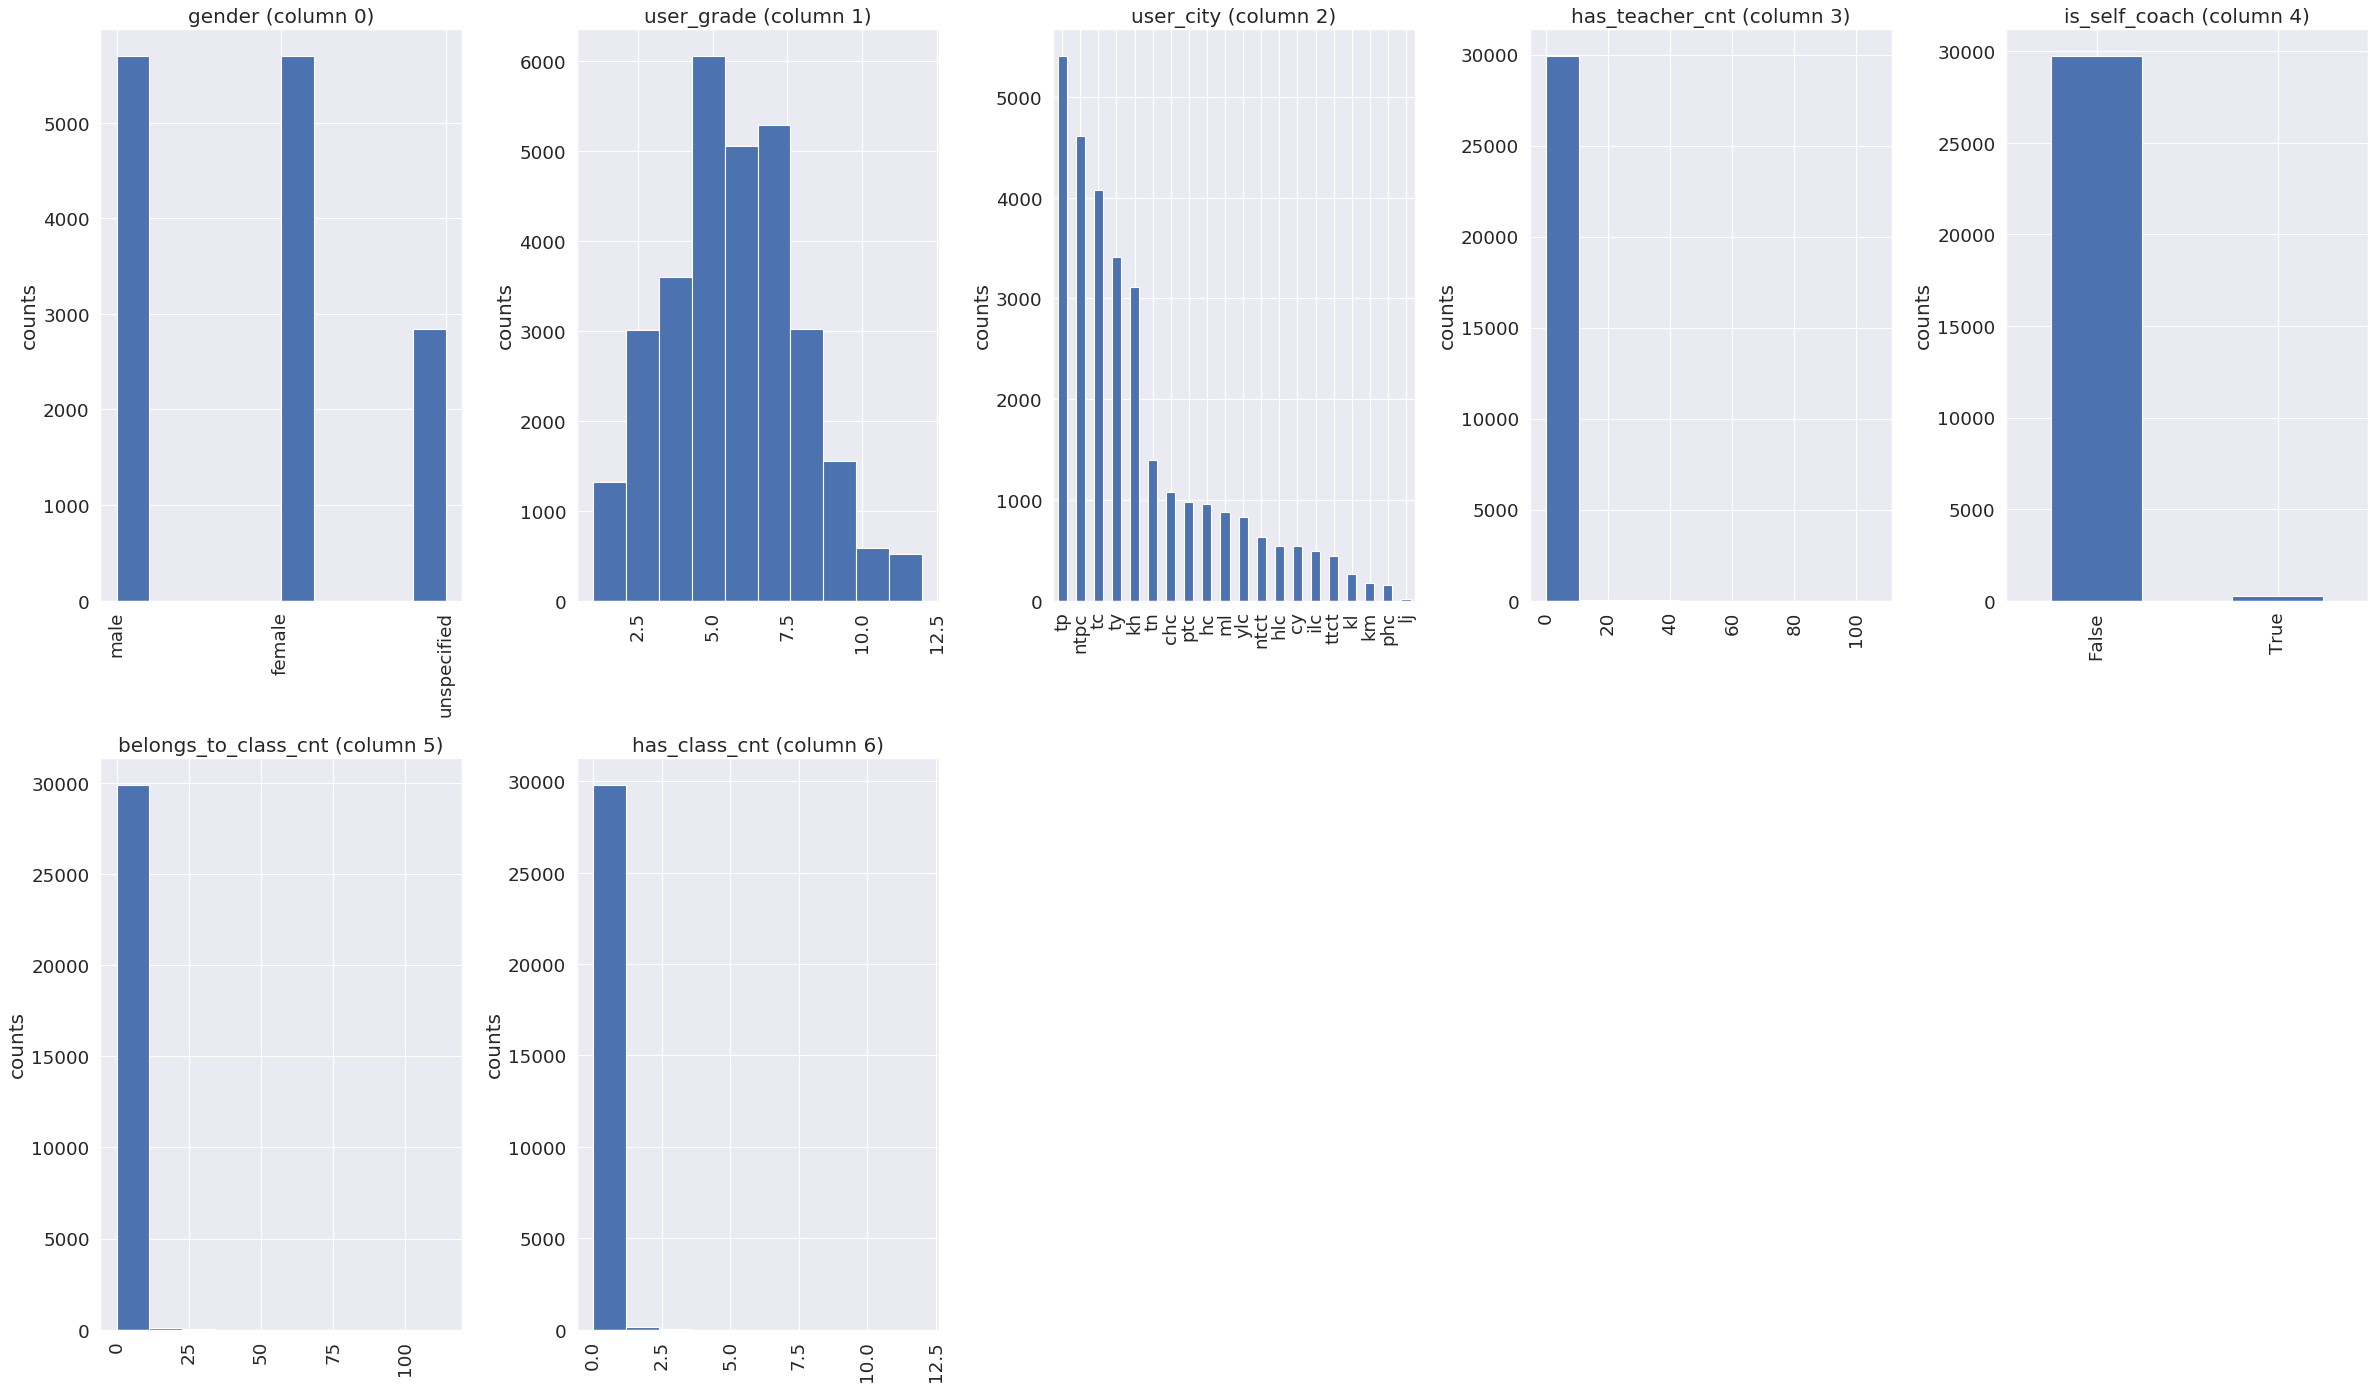

In [66]:
plotPerColumnDistribution(df_userdata, 10, 5)

Correlation matrix:

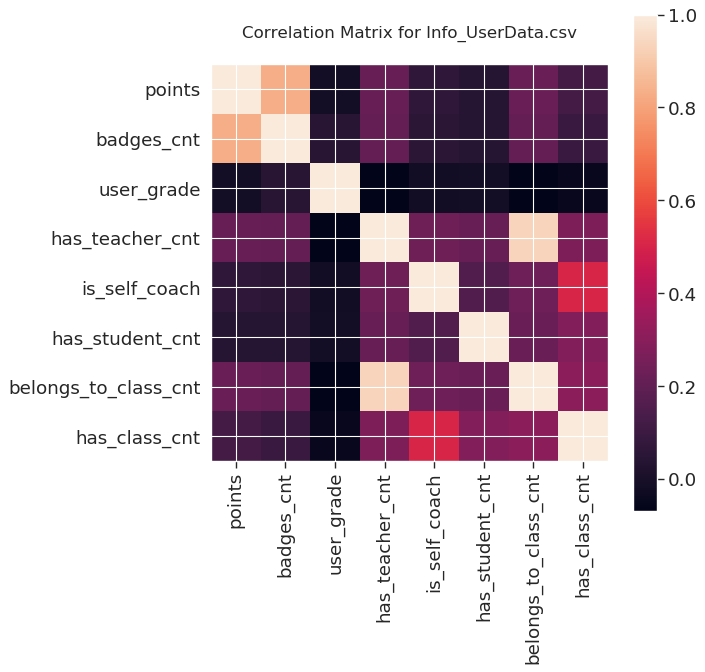

In [67]:
plotCorrelationMatrix(df_userdata, 8)

Scatter and density plots:

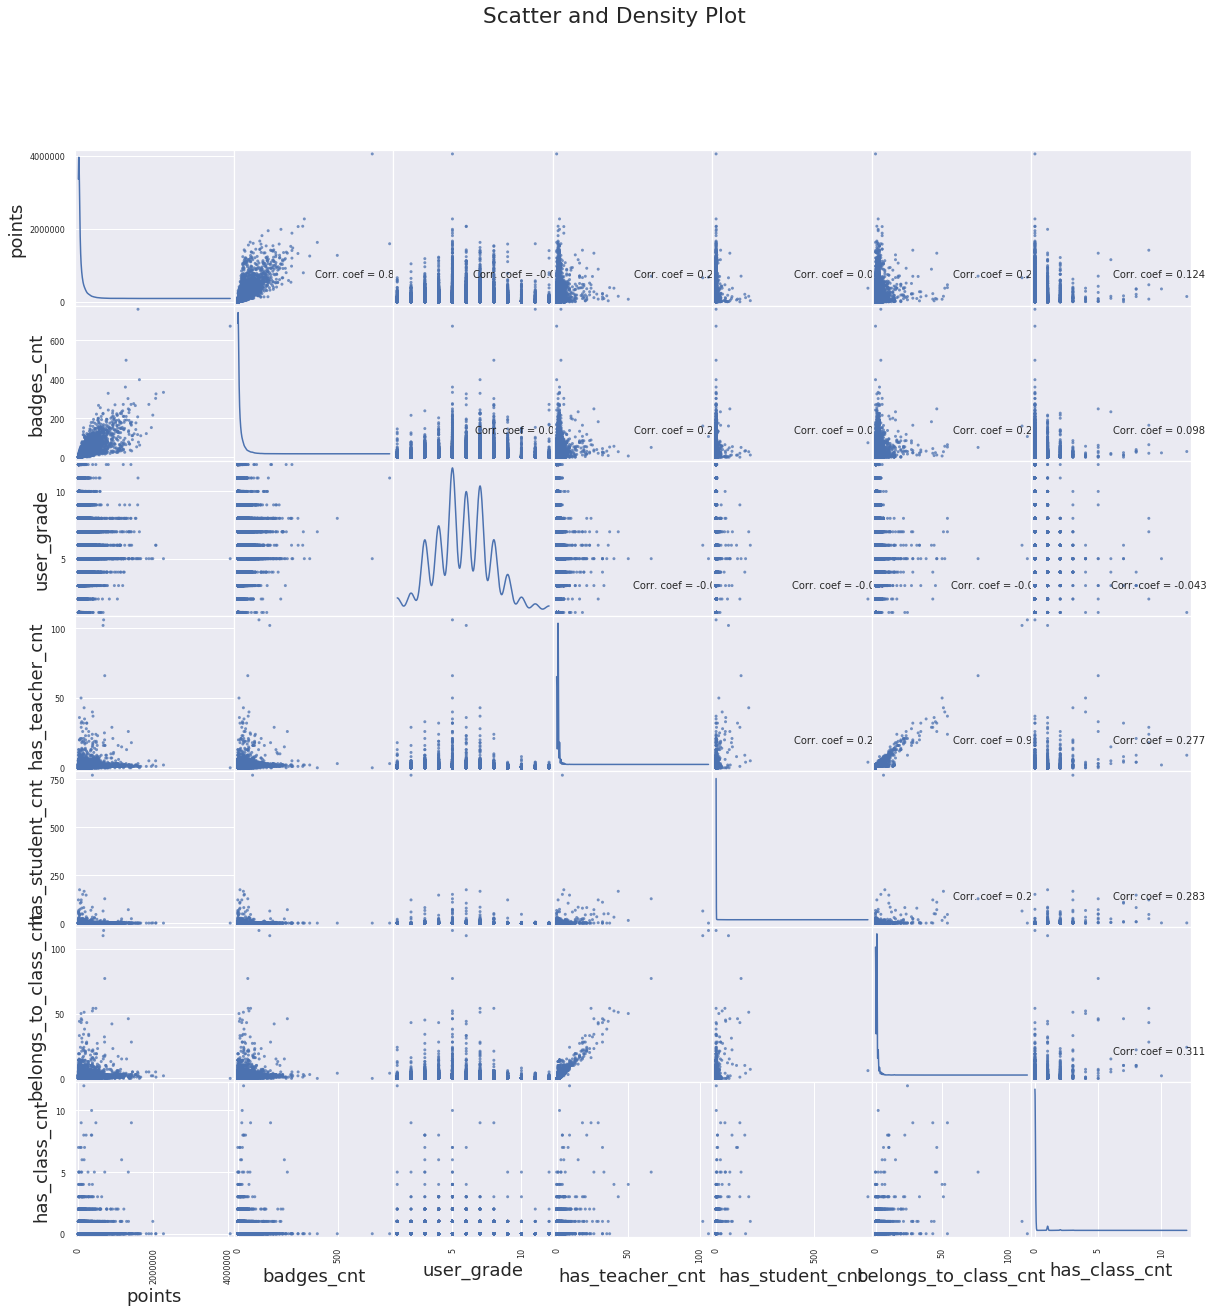

In [68]:
plotScatterMatrix(df_userdata, 20, 10)

### Let's check 3rd file: /kaggle/input/Log_Problem.csv

In [69]:

# Log_Problem.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_logProb = pd.read_csv('/kaggle/input/Log_Problem.csv', delimiter=',', nrows = nRowsRead)
df_logProb.dataframeName = 'Log_Problem.csv'
nRow, nCol = df_logProb.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 14 columns


Let's take a quick look at what the data looks like:

In [70]:
df_logProb.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


Distribution graphs (histogram/bar graph) of sampled columns:

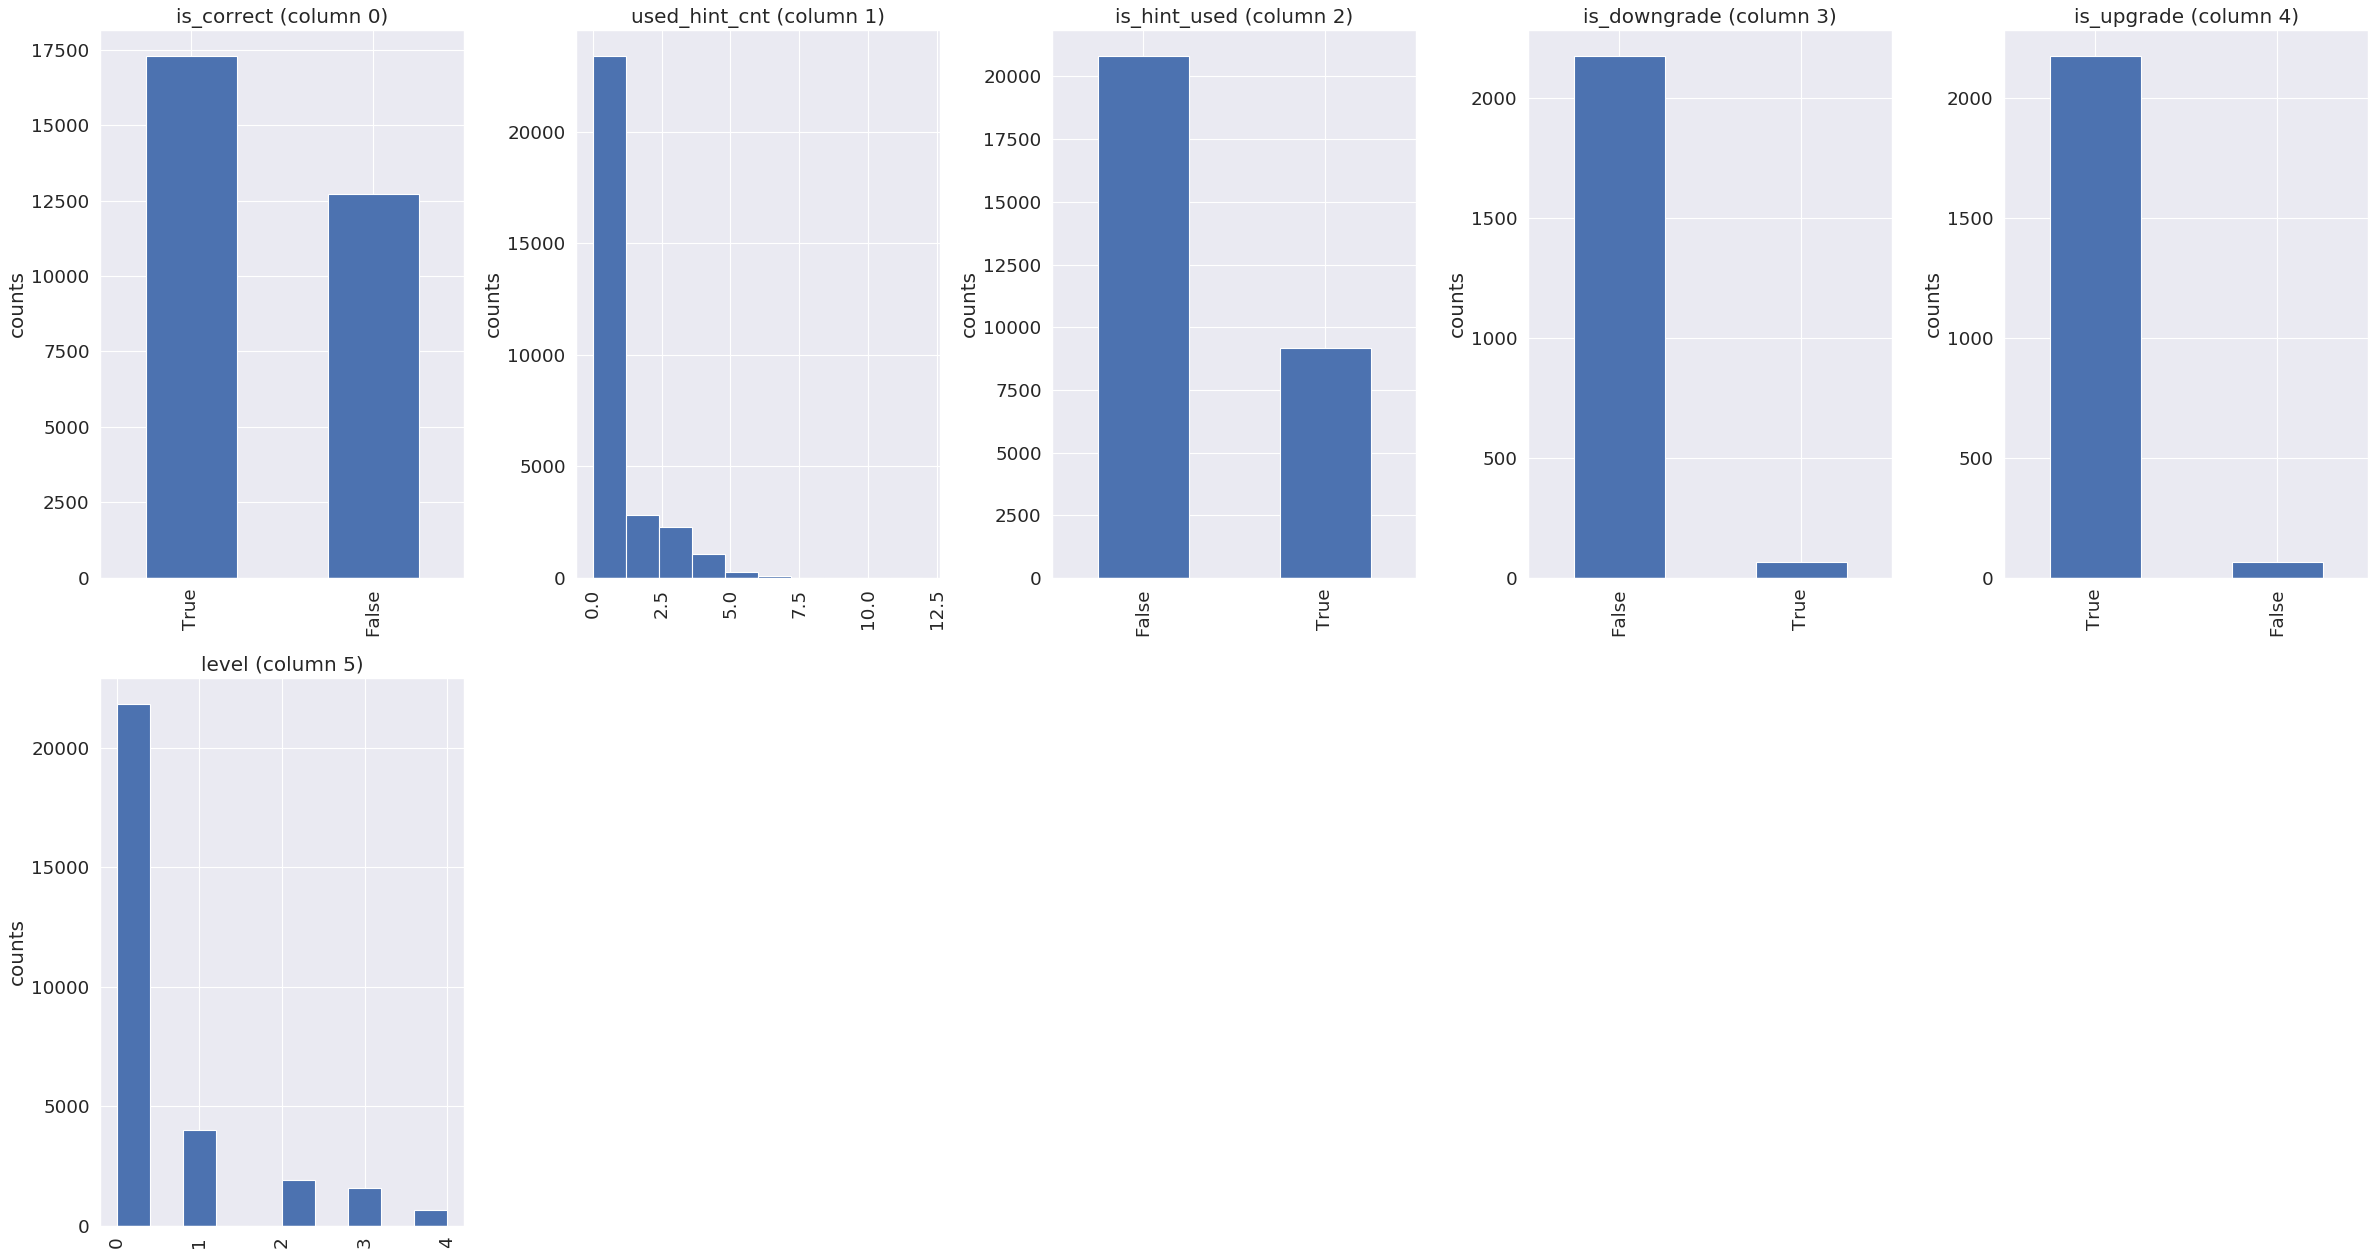

In [71]:
plotPerColumnDistribution(df_logProb, 10, 5)

Correlation matrix:

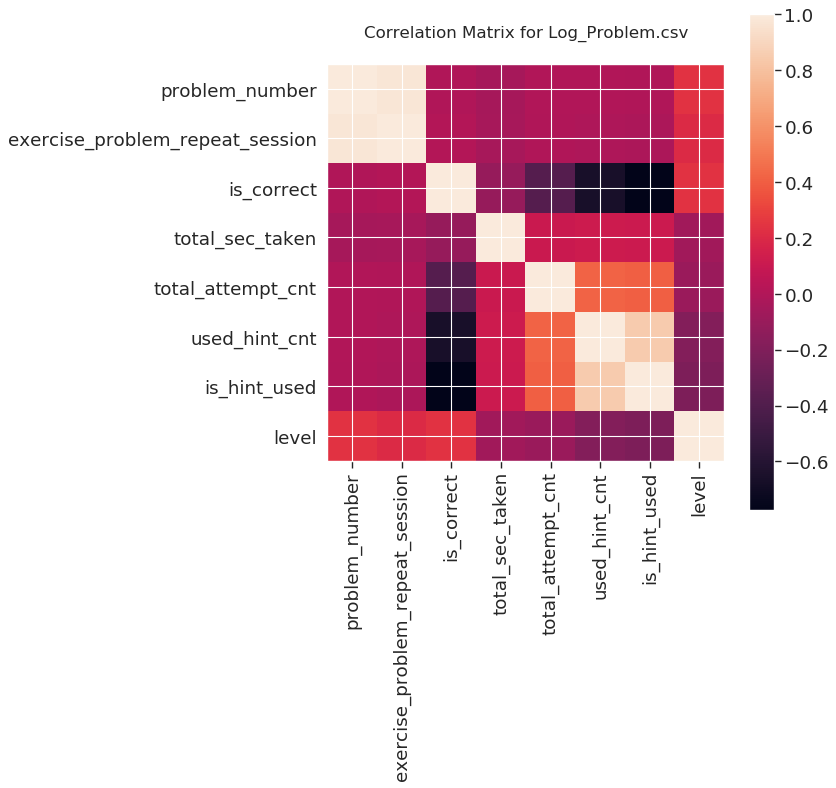

In [72]:
plotCorrelationMatrix(df_logProb, 8)

Scatter and density plots:

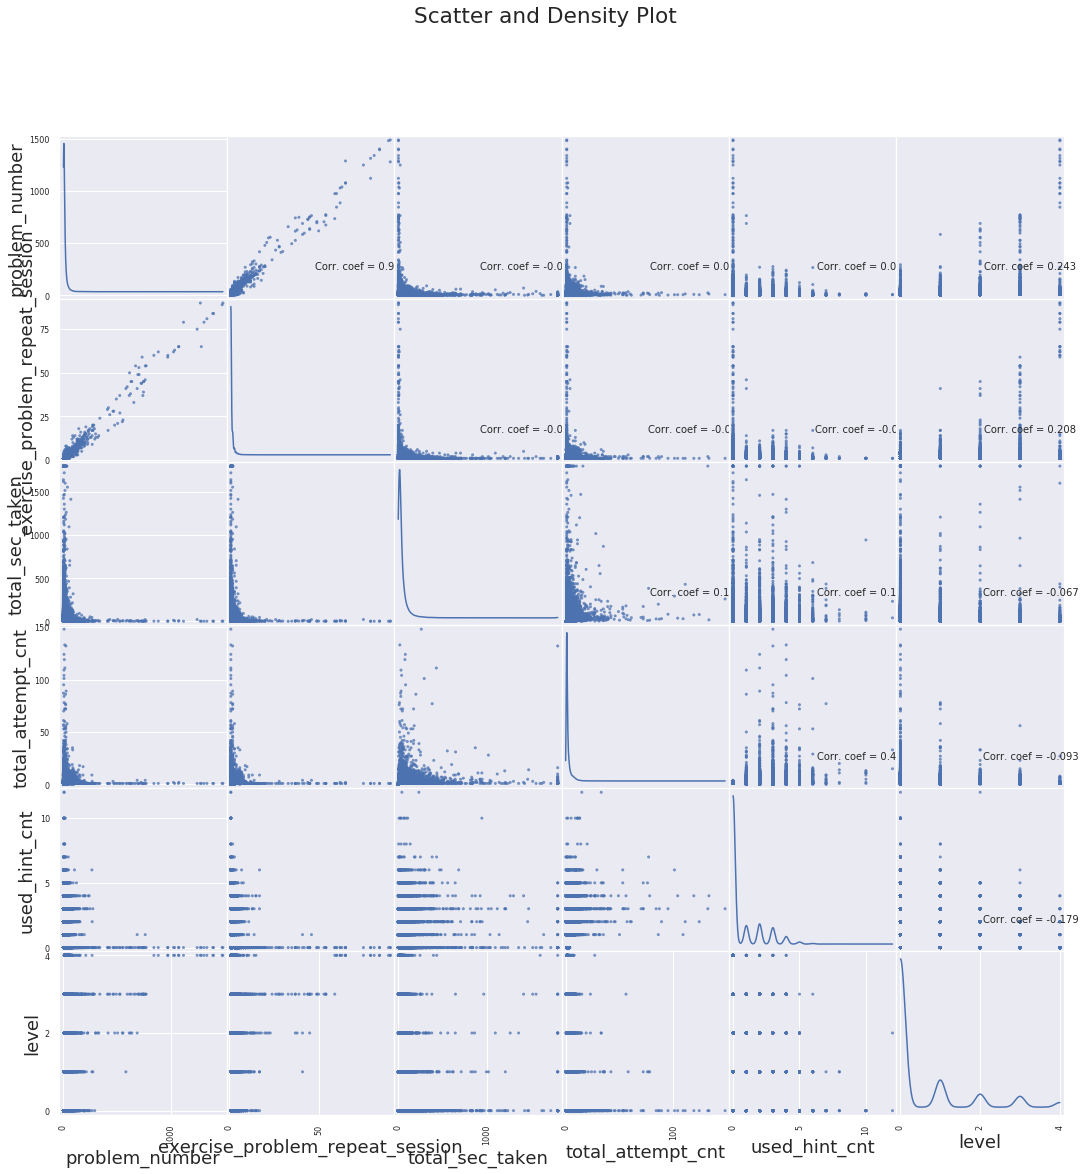

In [73]:
plotScatterMatrix(df_logProb, 18, 10)

## Set up Data to begin making Predictions

Now that we have visuals of all the dataframes we want to begin to set up data to make predictions

1. The first prediction we want to make about this data is whethere a student will complete an exercise, which represents the ability of the student on a certain concept.(Predicting if a student will make it to level 4)
This prediction might be done before the student even started the exercise, by using exercise prerequisites or related exercises.

2. If a student doesn't make it to level 4 we want to predict what level they will reach

3. We want to extend to predict whether a student will upgrade or downgrade on a certain exercise in the future.



In [74]:

df_logProb.shape, df_userdata.shape, df_content.shape

((30000, 14), (30000, 12), (1330, 10))

In [75]:
df_userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   uuid                  30000 non-null  object
 1   gender                14234 non-null  object
 2   points                30000 non-null  int64 
 3   badges_cnt            30000 non-null  int64 
 4   first_login_date_TW   30000 non-null  object
 5   user_grade            30000 non-null  int64 
 6   user_city             30000 non-null  object
 7   has_teacher_cnt       30000 non-null  int64 
 8   is_self_coach         30000 non-null  bool  
 9   has_student_cnt       30000 non-null  int64 
 10  belongs_to_class_cnt  30000 non-null  int64 
 11  has_class_cnt         30000 non-null  int64 
dtypes: bool(1), int64(7), object(4)
memory usage: 2.5+ MB


In [76]:
#col_list = ["uuid", "user_grade", "user_city", "has_teacher_cnt", 
#            "is_self_coach", "has_student_cnt", "belongs_to_class_cnt",
#            "has_class_cnt", "points", "ba"]

# Load modified dataframe of user data with only the above columns
#df_userdata_mod = pd.read_csv('/kaggle/input/Info_UserData.csv', delimiter=',', nrows = nRowsRead, usecols=col_list)


In [77]:
#df_userdata_mod.head()

In [78]:
#df_userdata_mod.info()

In [79]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ucid                 1330 non-null   object
 1   content_pretty_name  1330 non-null   object
 2   content_kind         1330 non-null   object
 3   difficulty           1330 non-null   object
 4   subject              1330 non-null   object
 5   learning_stage       1330 non-null   object
 6   level1_id            1330 non-null   object
 7   level2_id            1330 non-null   object
 8   level3_id            1330 non-null   object
 9   level4_id            1330 non-null   object
dtypes: object(10)
memory usage: 104.0+ KB


In [80]:
info_columns = df_content[["difficulty", "learning_stage"]]

In [81]:
new_df = df_userdata.join(info_columns)

In [82]:
new_df.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,difficulty,learning_stage
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0,easy,elementary
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0,easy,elementary
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0,easy,elementary
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0,easy,elementary
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0,easy,elementary


In [83]:
df_logProb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   timestamp_TW                     30000 non-null  object
 1   uuid                             30000 non-null  object
 2   ucid                             30000 non-null  object
 3   upid                             30000 non-null  object
 4   problem_number                   30000 non-null  int64 
 5   exercise_problem_repeat_session  30000 non-null  int64 
 6   is_correct                       30000 non-null  bool  
 7   total_sec_taken                  30000 non-null  int64 
 8   total_attempt_cnt                30000 non-null  int64 
 9   used_hint_cnt                    30000 non-null  int64 
 10  is_hint_used                     30000 non-null  bool  
 11  is_downgrade                     2239 non-null   object
 12  is_upgrade                      

In [84]:
df_logProb_mod = df_logProb.drop(columns= ["timestamp_TW", "uuid", "is_downgrade", "is_upgrade"])
df_logProb_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ucid                             30000 non-null  object
 1   upid                             30000 non-null  object
 2   problem_number                   30000 non-null  int64 
 3   exercise_problem_repeat_session  30000 non-null  int64 
 4   is_correct                       30000 non-null  bool  
 5   total_sec_taken                  30000 non-null  int64 
 6   total_attempt_cnt                30000 non-null  int64 
 7   used_hint_cnt                    30000 non-null  int64 
 8   is_hint_used                     30000 non-null  bool  
 9   level                            30000 non-null  int64 
dtypes: bool(2), int64(6), object(2)
memory usage: 1.9+ MB


In [85]:
new_df = new_df.join(df_logProb_mod)

In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   uuid                             30000 non-null  object
 1   gender                           14234 non-null  object
 2   points                           30000 non-null  int64 
 3   badges_cnt                       30000 non-null  int64 
 4   first_login_date_TW              30000 non-null  object
 5   user_grade                       30000 non-null  int64 
 6   user_city                        30000 non-null  object
 7   has_teacher_cnt                  30000 non-null  int64 
 8   is_self_coach                    30000 non-null  bool  
 9   has_student_cnt                  30000 non-null  int64 
 10  belongs_to_class_cnt             30000 non-null  int64 
 11  has_class_cnt                    30000 non-null  int64 
 12  difficulty                      

In [87]:
#new_df = new_df.drop(columns= ["learning_stage", "difficulty"])

In [88]:
new_df.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,...,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,level
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,...,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,3
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,...,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,...,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,...,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,...,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,0


In [89]:
#new_df = new_df.drop(columns=["is_downgrade", "is_upgrade"])

In [90]:
new_df['level'].value_counts()

0    21842
1     3989
2     1909
3     1586
4      674
Name: level, dtype: int64

In [91]:
# Add a binary column to show that if a student reaches level 4 they are proficient
# at that exercise

# new_df['Proficient'] = np.where(new_df['level']>=4, 1, 0)
new_df.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,...,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,level
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,...,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,3
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,...,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,...,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,...,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,...,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,0


In [92]:
# There should be 71 ones and 929 zeros in the Proficient column
#new_df["Proficient"].value_counts()

In [93]:
# Next thing we need to do is turn the object columns into category columns, then transform them into number columns 
# before we begin the modeling

for label, content in new_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
 

uuid
gender
first_login_date_TW
user_city
difficulty
learning_stage
ucid
upid


In [94]:
# This will turn all of the string values into category values
for label, content in new_df.items():
    if pd.api.types.is_string_dtype(content):
        new_df[label] = content.astype("category").cat.as_ordered()

In [95]:
# Check columns which *aren't* numeric
for label, content in new_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

uuid
gender
first_login_date_TW
user_city
difficulty
learning_stage
ucid
upid


In [96]:
# Turn categorical variables into numbers
for label, content in new_df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        new_df[label] = pd.Categorical(content).codes

In [97]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   uuid                             30000 non-null  int16
 1   gender                           30000 non-null  int8 
 2   points                           30000 non-null  int64
 3   badges_cnt                       30000 non-null  int64
 4   first_login_date_TW              30000 non-null  int16
 5   user_grade                       30000 non-null  int64
 6   user_city                        30000 non-null  int8 
 7   has_teacher_cnt                  30000 non-null  int64
 8   is_self_coach                    30000 non-null  bool 
 9   has_student_cnt                  30000 non-null  int64
 10  belongs_to_class_cnt             30000 non-null  int64
 11  has_class_cnt                    30000 non-null  int64
 12  difficulty                       30000 non-nul

### Split Data into Train and Test set for the First Prediction

A Reminder: The first prediction is to predict whether a student will make it to level 4 (Which is the level that determines if a student is proficient at the exercise). If they don't make it to level 4, we want to know what level we think they will make it too

In [98]:
from sklearn.model_selection import train_test_split

X = new_df.drop('level', axis=1)
y = new_df['level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

rfc_model.score(X_test, y_test)

0.7466666666666667

In [101]:
y_preds = rfc_model.predict(X_test)

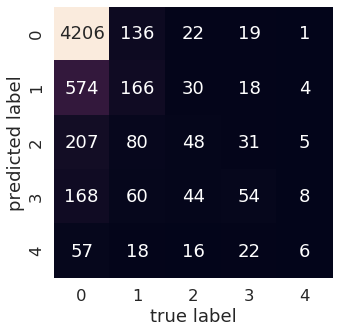

In [102]:
from sklearn.metrics import confusion_matrix

# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                    fmt='d')
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

So our model isn't doing to well. It's accuracy is at 69%. We will first try other models, then
whichever model gives the highest score we will hypertune that model:

1. KNeighborsClassifier
2. LinearSVC

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC



In [104]:
model_dict = {
      "KNeighborsClassifier" : KNeighborsClassifier(20),
      "LinearSVC": LinearSVC(),
}

def model_scores(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [105]:
model_scores(models=model_dict, 
             X_train=X_train,
             X_test=X_test,
             y_train=y_train,
             y_test=y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'KNeighborsClassifier': 0.7298333333333333, 'LinearSVC': 0.5795}

Let's try tuning all three of these models( KNeighbors, LinearSVC, and RFC to see if we can get the model into 90% accuracy)

Let' see what columns are the most important columns for deciding how the model is predicting

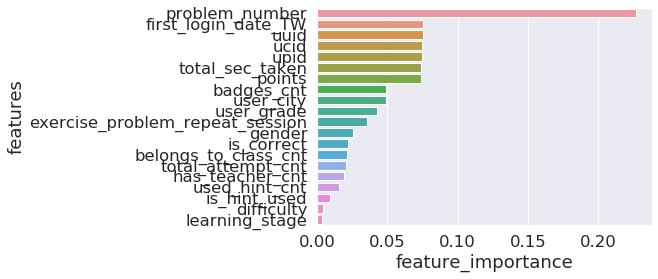

In [106]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")
    
plot_features(X_train.columns, rfc_model.feature_importances_)

Ok we will try reducing the number of columns of the dataframe first and see if that improves the model


In [119]:
new_df_cut = new_df[["problem_number", "ucid", "uuid","upid", "total_sec_taken", "user_grade", "user_city",
                     "points", "exercise_problem_repeat_session", "is_correct", "total_attempt_cnt", "level", 
                     "belongs_to_class_cnt", "has_teacher_cnt", "used_hint_cnt", "is_hint_used", 
                     "gender", "difficulty", "learning_stage"]]

new_df_cut.head()

,problem_number,ucid,uuid,upid,total_sec_taken,user_grade,user_city,points,exercise_problem_repeat_session,is_correct,total_attempt_cnt,level,belongs_to_class_cnt,has_teacher_cnt,used_hint_cnt,is_hint_used,gender,difficulty,learning_stage
0,18,409,16945,6136,33,1,5,18300,2,True,1,3,0,0,0,False,-1,0,0
1,4,259,23373,3026,8,1,11,6468,1,True,1,0,1,1,0,False,-1,0,0
2,9,597,24166,596,17,1,16,4703,1,True,1,0,0,0,0,False,1,0,0
3,2,1073,9961,8860,10,2,11,15525,1,True,1,0,0,0,0,False,-1,0,0
4,6,1127,25689,8693,98,2,7,7945,1,True,1,0,1,1,0,False,-1,0,0


In [108]:
from sklearn.model_selection import train_test_split

X_cut = new_df_cut.drop('level', axis=1)
y_cut = new_df_cut['level']

# X = new_df.drop('level', axis=1)
# y = new_df['level']

X_train_cut, X_test_cut, y_train_cut, y_test_cut = train_test_split(X_cut, y_cut, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train_cut, y_train_cut)

rfc_model.score(X_test_cut, y_test_cut)

0.7345

In [109]:
from sklearn.model_selection import RandomizedSearchCV
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(100, 510, 100),
           "min_samples_split": np.arange(8, 14, 3),
           "min_samples_leaf": np.arange(1, 6, 3)
           }



# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit and score random hyperparameter search model
rs_rf.fit(X_train, y_train);
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 16.8min finished


0.7516666666666667

In [110]:
rs_rf.best_params_

{'n_estimators': 500, 'min_samples_split': 11, 'min_samples_leaf': 1}

In [116]:
best_params = {'n_estimators': 500,
               'min_samples_split': [11],
               'min_samples_leaf': [1],
                'max_depth': [None]}
np.random.seed(42)
best_model = RandomForestClassifier(n_estimators=510, min_samples_split=14, min_samples_leaf=1)
best_model.fit(X_train, y_train)

best_model.score(X_test, y_test)

0.7508333333333334

In [129]:
from sklearn.preprocessing import MinMaxScaler


min_max_scaler = MinMaxScaler()
normalized_df = pd.DataFrame(min_max_scaler.fit_transform(new_df), index=new_df.index, columns=new_df.columns)




In [134]:
from sklearn import preprocessing

X = normalized_df.drop('level', axis=1)
y = normalized_df['level']

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



best_model.fit(X_train2, y_train2)

best_model.score(X_test2, y_test2)

0.7536666666666667

In [136]:
np.random.seed(42)
normalized_df = pd.DataFrame(normalized_df)
shuffled_df = normalized_df.reindex(np.random.permutation(normalized_df.index))
shuffled_df.head()


,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,...,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,level
2308,0.406714,1.0,0.003170,0.002632,0.401163,0.454545,0.263158,0.009434,0.0,0.0,...,0.312448,0.089306,0.022880,0.011236,0.0,0.203333,0.074324,0.250000,1.0,0.0
22404,0.477916,0.0,0.009570,0.009211,0.203488,0.363636,0.578947,0.009434,0.0,0.0,...,0.117794,0.035619,0.015478,0.011236,1.0,0.006667,0.006757,0.000000,0.0,1.0
23397,0.498017,0.0,0.043636,0.019737,0.209302,0.636364,0.684211,0.009434,0.0,0.0,...,0.600668,0.553558,0.002692,0.000000,0.0,0.003333,0.027027,0.083333,1.0,0.0
25058,0.077069,0.0,0.003379,0.001316,0.226744,0.454545,0.578947,0.009434,0.0,0.0,...,0.408521,0.338811,0.000673,0.000000,1.0,0.015000,0.006757,0.000000,0.0,0.0
2664,0.823327,0.0,0.000740,0.000000,0.418605,0.272727,0.736842,0.000000,0.0,0.0,...,0.017544,0.970059,0.000000,0.000000,1.0,0.006667,0.006757,0.000000,0.0,0.0


In [137]:
X_shuffle = shuffled_df.drop('level', axis=1)
y_shuffle = shuffled_df['level']

lab_enc = preprocessing.LabelEncoder()
y_encoded_shuffle = lab_enc.fit_transform(y_shuffle)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_shuffle, y_encoded_shuffle, test_size=0.2, random_state=42)



best_model.fit(X_train2, y_train2)

best_model.score(X_test2, y_test2)

0.7455

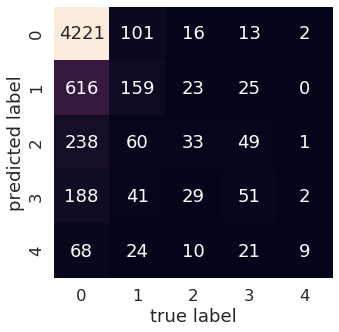

In [138]:
preds_with_normalized_dataset = best_model.predict(X_test2)
plot_conf_mat(y_test2, preds_with_normalized_dataset)

So it looks like the best model we have created for predicting the level a student will acheive in each exercise is the normalized Random Forest Model. It has an accuracy of just over 75%, which isn't too bad but it can surely be improved. We can take this model and use it to help plan online course that fit the level of the students,and to assist with finding similar course that students may do well in.